In [1]:
import construction as cs
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp


import dynamic_metrics as ds


import matplotlib.pyplot as plt

### read font
from matplotlib import font_manager

font_dirs = ['Barlow/']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

# set font
plt.rcParams['font.family'] = 'Barlow'

import networkx as nx
%matplotlib inline
%config InlineBackend.figure_format = 'retina'




%load_ext autoreload
%autoreload 2

In [119]:
def load_origin_graph(file_name,gap=299):
    data_in = cs.load_data("../Datasets/"+file_name+".dat")
    gap = 299 
    graphs_in = cs.build_graphs(data_in,gap=gap)
    return graphs_in

def load_ETNgen_graph(file_name):
    path = "../Generated_graphs/Multiple_run/"+file_name+"/"
    gap = 299 
    graphs = []
    for i in os.listdir(path)[0:2]:
        print(path+i)
        data_in = cs.load_data(path+i)
        graphs_in = cs.build_graphs(data_in,gap=gap)
        graphs.append(graphs_in)
    return graphs


def load_dym_graph(file_name):
    path = "../Competitors_generated_graphs/Dymond/Multiple_run/"+file_name+"/"
    gap = 0 
    graphs = []
    for i in os.listdir(path)[0:2]:
        print(path+i)
        data_in = cs.load_data(path+i)
        graphs_in = cs.build_graphs(data_in,gap=gap)
        graphs.append(graphs_in)
    return graphs

def load_stm_graph(file_name):
    path = "../Competitors_generated_graphs/STM/Multiple_run/"+file_name+"/"
    gap = 0 
    graphs = []
    for i in os.listdir(path)[0:2]:
        print(path+i)
        data_in = cs.load_data(path+i)
        graphs_in = cs.build_graphs(data_in,gap=gap)
        graphs.append(graphs_in)
    return graphs

def load_tag_graph(file_name):
    path = "../Competitors_generated_graphs/TagGen/Multiple_run/"+file_name+"/"
    gap = 0 
    graphs = []
    for i in os.listdir(path)[0:2]:
        print(path+i)
        data_in = cs.load_data(path+i)
        graphs_in = cs.build_graphs(data_in,gap=gap)
        graphs.append(graphs_in)
    return graphs

In [120]:
import os 

In [173]:
file_name = "InVS13"
file_name = "LH10"
file_name = "High_School11"

orig_graphs = load_origin_graph(file_name,gap=299)
etn_gen = load_ETNgen_graph(file_name)
dym_gen = load_dym_graph(file_name)
tag_gen = load_tag_graph(file_name)
stm_gen = load_stm_graph(file_name)

../Generated_graphs/Multiple_run/High_School11/hs_5.dat
../Generated_graphs/Multiple_run/High_School11/hs_6.dat
../Competitors_generated_graphs/Dymond/Multiple_run/High_School11/High_School11_dym1.dat
../Competitors_generated_graphs/Dymond/Multiple_run/High_School11/High_School11_dym7.dat
../Competitors_generated_graphs/TagGen/Multiple_run/High_School11/High_School11_8_generato_TagGen.dat
../Competitors_generated_graphs/TagGen/Multiple_run/High_School11/High_School11_5_generato_TagGen.dat
../Competitors_generated_graphs/STM/Multiple_run/High_School11/High_School11_STM_2.dat
../Competitors_generated_graphs/STM/Multiple_run/High_School11/High_School11_STM_0.dat


In [174]:
r = []
for i in etn_gen:
    r.append(len(i[0]))
np.mean(r),np.std(r)

(126.0, 0.0)

In [175]:
start = int(len(etn_gen[0])/2)

In [176]:
import os

path = "dynamic_results/"+file_name+"/Multiple_run"
COV = path+"/coverage_meta"
MFPTs = path+"/MFPT_meta"

if not os.path.exists(path):
    os.makedirs(path)
    
if not os.path.exists(COV):
    os.makedirs(COV)
if not os.path.exists(MFPTs):
    os.makedirs(MFPTs)

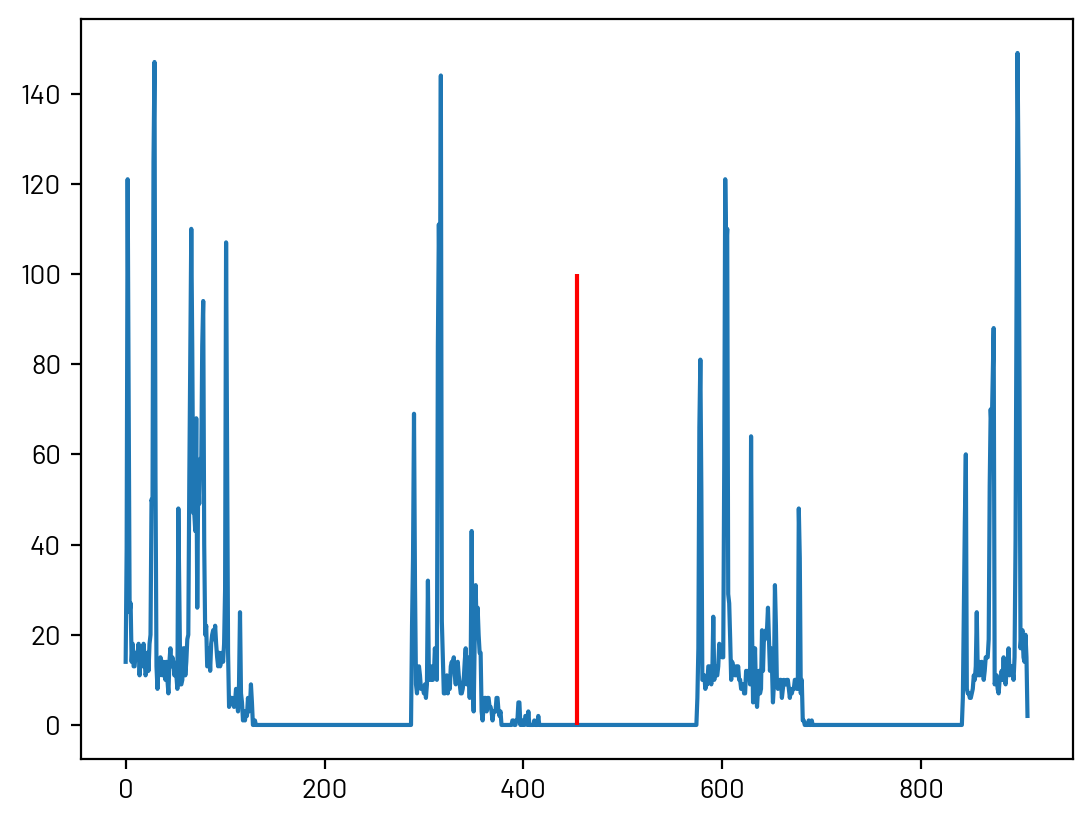

In [177]:
n = []
for g in orig_graphs:
    n.append(len(g.edges()))
    
plt.plot(n)
plt.vlines(start,0,100,color="red")

In [178]:
#start = 285 # HS
#start = 210 # LH
#start = 290 #Invs

# coverage

k volte, con n0 e t0 random

In [179]:
from scipy.stats import ks_2samp

In [180]:
K = 1000
T = 50
c_stm,c_mio,c_tag,c_dym = [],[],[],[]
for stm in stm_gen:
    c_stm.append(ds.coverage(stm[start:],K,T))
print("STM done")
c_orig = ds.coverage(orig_graphs[start:],K,T)
c_stab = ds.coverage(orig_graphs[start:],K,T)
for etn in etn_gen:
    c_mio.append(ds.coverage(etn[start:],K,T))
print("ETN done")
for tag in tag_gen:
    c_tag.append(ds.coverage(tag[start:],K,T))
print("TAG done")
for dym in dym_gen:
    c_dym.append( ds.coverage(dym[start:],K,T))
print("DYM done")


STM done
ETN done
TAG done
DYM done


In [181]:
def mean_ks(c_orig,c_gens):
    res = []
    for i in c_gens:
        res.append(ks_2samp(c_orig,i)[0])
    return np.mean(res),np.std(res)

In [182]:

print("coverage")
print("orig vs sta \t",ks_2samp(c_orig, c_stab)[0])
print("orig vs mio \t",mean_ks(c_orig, c_mio))
print("orig vs tag \t",mean_ks(c_orig, c_tag))
print("orig vs dym \t",mean_ks(c_orig, c_dym))
print("orig vs stm \t",mean_ks(c_orig, c_stm))

coverage
orig vs sta 	 0.041
orig vs mio 	 (0.11, 0.023000000000000007)
orig vs tag 	 (0.259, 0.15)
orig vs dym 	 (0.6185, 0.0615)
orig vs stm 	 (0.273, 0.0040000000000000036)


In [183]:
np.save(COV+"/stab",c_stab)
np.save(COV+"/orig",c_orig)
np.save(COV+"/tag",c_tag)
np.save(COV+"/etn",c_mio)
np.save(COV+"/dym",c_dym)
np.save(COV+"/stm",c_stm)

# MFPT

In [184]:
path = "dynamic_results/"+file_name+"/Multiple_run"
MFPTs = path+"/MFPT_meta"
MFPTs

'dynamic_results/High_School11/Multiple_run/MFPT_meta'

In [185]:
orig_graphs = load_origin_graph(file_name,gap=299)
etn_gen = load_ETNgen_graph(file_name)
dym_gen = load_dym_graph(file_name)
tag_gen = load_tag_graph(file_name)
stm_gen = load_stm_graph(file_name)
print(MFPTs)

../Generated_graphs/Multiple_run/High_School11/hs_5.dat
../Generated_graphs/Multiple_run/High_School11/hs_6.dat
../Competitors_generated_graphs/Dymond/Multiple_run/High_School11/High_School11_dym1.dat
../Competitors_generated_graphs/Dymond/Multiple_run/High_School11/High_School11_dym7.dat
../Competitors_generated_graphs/TagGen/Multiple_run/High_School11/High_School11_8_generato_TagGen.dat
../Competitors_generated_graphs/TagGen/Multiple_run/High_School11/High_School11_5_generato_TagGen.dat
../Competitors_generated_graphs/STM/Multiple_run/High_School11/High_School11_STM_2.dat
../Competitors_generated_graphs/STM/Multiple_run/High_School11/High_School11_STM_0.dat
dynamic_results/High_School11/Multiple_run/MFPT_meta


In [186]:
start,len(etn_gen[0])

(454, 909)

In [187]:
K = 1
m_ori = ds.MFPT(orig_graphs[start:],K)
m_ori2 = [x for x in m_ori if x < max(m_ori)-10]
print(1)
m_stb = ds.MFPT(orig_graphs[start:],K)
m_stb2 = [x for x in m_stb if x < max(m_ori)-10]
print(2)

m_stm,m_mio,m_tag,m_dym = [],[],[],[]

c = 0
for stm in stm_gen:
    c = c + 1
    print("\t",c)
    tmp = ds.MFPT(stm[start:],K)
    tmp = [x for x in tmp if x < max(m_ori)-10]
    m_stm.append(tmp)
print("STM done")

c = 0
for etn in etn_gen:
    c = c + 1
    print("\t",c)
    tmp = ds.MFPT(etn[start:],K)
    tmp = [x for x in tmp if x < max(m_ori)-10]
    m_mio.append(tmp)
print("ETN done")

c = 0
for tag in tag_gen:
    c = c + 1
    print("\t",c)
    tmp = ds.MFPT(tag[start:],K)
    tmp = [x for x in tmp if x < max(m_ori)-10]
    m_tag.append(tmp)
print("TAG done")

c = 0
for dym in dym_gen:
    c = c + 1
    print("\t",c)
    tmp = ds.MFPT(dym[start:],K)
    tmp = [x for x in tmp if x < max(m_ori)-10]
    m_dym.append(tmp)
print("SYM done")

1
2
	 1
	 2
STM done
	 1
	 2
ETN done
	 1
	 2
TAG done
	 1
	 2
SYM done


In [188]:
print("orig vs sta \t",ks_2samp(m_ori2, m_stb2)[0])
print("orig vs mio \t",mean_ks(m_ori2, m_mio))
print("orig vs mio \t",mean_ks(m_ori2, m_tag))
print("orig vs mio \t",mean_ks(m_ori2, m_dym))
print("orig vs mio \t",mean_ks(m_ori2, m_stm))

orig vs sta 	 0.0405892275191196
orig vs mio 	 (0.09789117283314033, 0.00728160367752511)
orig vs mio 	 (0.13371773230599313, 0.01111948873397911)
orig vs mio 	 (0.2877868623143275, 0.012466481991880246)
orig vs mio 	 (0.5381930396015598, 0.27108640535355705)


In [189]:
m_tag = conver_to_np(m_tag)
m_mio = conver_to_np(m_mio)
m_dym = conver_to_np(m_dym)
m_stm = conver_to_np(m_stm)

In [190]:
np.save(MFPTs+"/stab",m_stb2)
np.save(MFPTs+"/orig",m_ori2)
np.save(MFPTs+"/tag",a)
np.save(MFPTs+"/etn",m_mio)
np.save(MFPTs+"/dym",m_dym)
np.save(MFPTs+"/stm",m_stm)

In [191]:
def conver_to_np(g):
    a = []
    a.append(np.array(g[0]))
    a.append(np.array(g[1]))

    return np.array(a, dtype=object)

# SIR model

In [202]:
#start = 285 # HS
#start = 210 # LH
#start = 290 #Invs

file_name = "InVS13"

In [203]:
import os

path = "dynamic_results/"+file_name+"/Multiple_run"
R0 = path+"/R0_meta/"
la025 = R0+"la025"
la015 = R0+"la015"
la001 = R0+"la001"
if not os.path.exists(la001):
    os.makedirs(la025)
    os.makedirs(la015)
    os.makedirs(la001)
path

'dynamic_results/InVS13/Multiple_run'

In [204]:
orig_graphs = load_origin_graph(file_name,gap=299)
etn_gen = load_ETNgen_graph(file_name)
dym_gen = load_dym_graph(file_name)
tag_gen = load_tag_graph(file_name)
stm_gen = load_stm_graph(file_name)

../Generated_graphs/Multiple_run/InVS13/in_2.dat
../Generated_graphs/Multiple_run/InVS13/in_3.dat
../Competitors_generated_graphs/Dymond/Multiple_run/InVS13/InVS13_dym7.dat
../Competitors_generated_graphs/Dymond/Multiple_run/InVS13/InVS13_dym8.dat
../Competitors_generated_graphs/TagGen/Multiple_run/InVS13/InVS13_6_generato_TagGen.dat
../Competitors_generated_graphs/TagGen/Multiple_run/InVS13/InVS13_0_generato_TagGen.dat
../Competitors_generated_graphs/STM/Multiple_run/InVS13/InVS13_STM_3.dat
../Competitors_generated_graphs/STM/Multiple_run/InVS13/InVS13_STM_7.dat


In [205]:
start = int(len(etn_gen[0])/2)
start,len(etn_gen[0])

(1647, 3294)

In [206]:
for lambd in [0.25,0.15,0.01]:
    mu =0.005
    K = 100

    if lambd == 0.25:
        la = la025
    if lambd == 0.15:
        la = la015
    if lambd == 0.01:
        la = la001

    print("R0 lambda",lambd,lambd)
    r_ori = ds.compute_r0(K,orig_graphs,lambd,mu)
    r_sta = ds.compute_r0(K,orig_graphs,lambd,mu)
    r_etn,r_stm,r_tag,r_dym = [],[],[],[]
    for etn in etn_gen:
        r_etn.append(ds.compute_r0(K,etn[start:],lambd,mu))
    print("Done ETN")
    for stm in stm_gen:
        r_stm.append(ds.compute_r0(K,stm[start:],lambd,mu))
    print("Done STM")
    for tag in tag_gen:
        r_tag.append(ds.compute_r0(K,tag[start:],lambd,mu))
    print("Done TAG")
    for dym in dym_gen:
        r_dym.append(ds.compute_r0(K,dym[start:],lambd,mu))
    print("Done DYM")

    print("orig vs sta \t",ks_2samp(r_ori, r_sta)[0])
    print("orig vs etn \t",mean_ks(r_ori, r_etn))
    print("orig vs stm \t",mean_ks(r_ori, r_stm))
    print("orig vs tag \t",mean_ks(r_ori, r_tag))
    print("orig vs dym \t",mean_ks(r_ori, r_dym))

    np.save(la+"/stab",r_sta)
    np.save(la+"/orig",r_ori)
    np.save(la+"/tag",r_tag)
    np.save(la+"/etn",r_etn)
    np.save(la+"/dym",r_dym)
    np.save(la+"/stm",r_stm)

R0 lambda 0.25 0.25
Done ETN
Done STM
Done TAG
Done DYM
orig vs sta 	 0.07
orig vs etn 	 (0.34, 0.0)
orig vs stm 	 (0.32, 0.07)
orig vs tag 	 (0.28500000000000003, 0.014999999999999986)
orig vs dym 	 (0.67, 0.010000000000000009)
R0 lambda 0.15 0.15
Done ETN
Done STM
Done TAG
Done DYM
orig vs sta 	 0.08
orig vs etn 	 (0.305, 0.015000000000000013)
orig vs stm 	 (0.225, 0.115)
orig vs tag 	 (0.265, 0.024999999999999994)
orig vs dym 	 (0.685, 0.034999999999999976)
R0 lambda 0.01 0.01
Done ETN
Done STM
Done TAG
Done DYM
orig vs sta 	 0.02
orig vs etn 	 (0.07, 0.010000000000000002)
orig vs stm 	 (0.01, 0.0)
orig vs tag 	 (0.035, 0.005000000000000001)
orig vs dym 	 (0.33999999999999997, 0.05000000000000002)
